<img src="https://rhyme.com/assets/img/logo-dark.png" align="center">

<h2 align="center"> Univariate Linear Regression </h2>

### Task 2: Load the Data and Libraries
---

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [5]:
data = pd.read_csv('bike_sharing_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Task 3: Visualize the Data
---

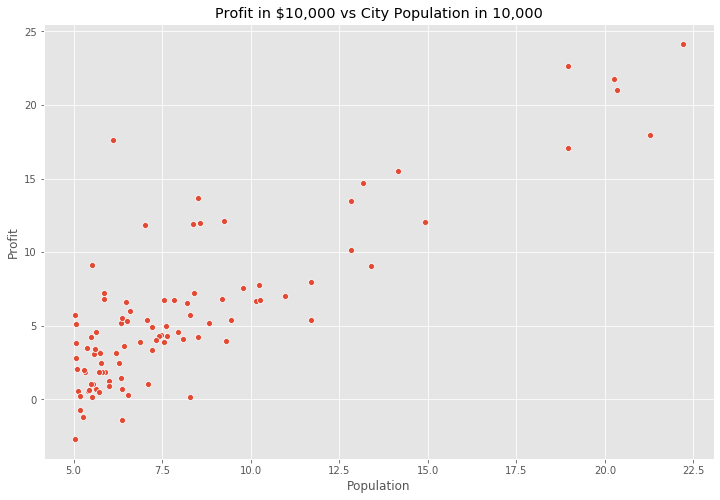

In [9]:
ax = sns.scatterplot(x='Population',y='Profit',data=data)
ax.set_title('Profit in $10,000 vs City Population in 10,000');

In [12]:
 np.corrcoef(data['Population'],data['Profit'])[0,1]

0.837873232526341

### Task 4: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [46]:
def cost_function(X,y,theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y)**2
    return 1/(2*m) * np.sum(error)

In [47]:
m = data.Population.shape[0]
X = np.append(np.ones((m,1)), data.Population.values.reshape(m,1),axis=1)
y = data.Profit.values.reshape(m,1)
theta = np.zeros((2,1))


In [48]:
cost_function(X,y,theta)

32.072733877455676


My Solution:
* Minimising cost function when $\theta_0$ = 0 and $\theta_1$ = 0


$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$ $=>$ 

$$h_{\theta}(x) = 0 + 0x_1$$ $=>$


$$h_{\theta}(x) = 0$$ 


<br>


$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (y^{(i)} )^2$$

<br>



In [54]:
np.sum(data['Profit'] ** 2) / (2*(data.shape[0])) # y

32.072733877455676

Verify: 


$$h_{\theta}(x) = 0 + 0x_1$$ 

<\br>


$$
\begin{bmatrix}
1 & 6.1101 \\
1 & 5.5277 \\
... & ... \\
1 & 5.4369
\end{bmatrix}
*

\begin{bmatrix}
0 \\
0
\end{bmatrix}

= 

\begin{bmatrix}
0 \\
0 \\
...\\
0
\end{bmatrix}
$$



In [62]:
X = np.column_stack(\
    [np.ones((m,1)),\
    data.Population.values.reshape(m,1)
    ])


### Task 5: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

### Task 6: Visualising the Cost Function $J(\theta)$
---

### Task 7: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

### Task 8: Training Data with Linear Regression Fit
---

### Task 9: Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$